In [1]:
# import the main libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Data/raw/Country by commodity Imports.xlsx", sheet_name="Country by Commodity Import", header=0)
df.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021MAR,2021APR,2021MAY,2021JUN,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC
0,0 Food & live animals,AD Andorra,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0 Food & live animals,AE United Arab Emirates,IM Imports,0.71,0.71,8.59,1.43,0.85,0.93,0.79,...,5.34,1.52,1.17,1.32,1.54,1.76,1.33,1.03,1.38,1.74
2,0 Food & live animals,AF Afghanistan,IM Imports,0.06,0.00,0.00,0.00,0.02,0.12,0.00,...,0.10,0.12,0.02,0.00,0.03,0.01,0.00,0.00,0.10,0.15
3,0 Food & live animals,AG Antigua and Barbuda,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.02,0.00,0.04,0.00,0.00,0.05,0.00,0.00,0.00
4,0 Food & live animals,AI Anguilla,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00


In [3]:
df.shape

(29625, 51)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29625 entries, 0 to 29624
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COMMODITY  29625 non-null  object 
 1   COUNTRY    29625 non-null  object 
 2   DIRECTION  29625 non-null  object 
 3   2018JAN    29500 non-null  float64
 4   2018FEB    29500 non-null  float64
 5   2018MAR    29500 non-null  float64
 6   2018APR    29500 non-null  float64
 7   2018MAY    29500 non-null  float64
 8   2018JUN    29500 non-null  float64
 9   2018JUL    29500 non-null  float64
 10  2018AUG    29500 non-null  float64
 11  2018SEP    29500 non-null  float64
 12  2018OCT    29500 non-null  float64
 13  2018NOV    29500 non-null  float64
 14  2018DEC    29500 non-null  float64
 15  2019JAN    29500 non-null  float64
 16  2019FEB    29500 non-null  float64
 17  2019MAR    29500 non-null  float64
 18  2019APR    29500 non-null  float64
 19  2019MAY    29500 non-null  float64
 20  2019JU

In [5]:
df.columns

Index(['COMMODITY', 'COUNTRY', 'DIRECTION', '2018JAN', '2018FEB', '2018MAR',
       '2018APR', '2018MAY', '2018JUN', '2018JUL', '2018AUG', '2018SEP',
       '2018OCT', '2018NOV', '2018DEC', '2019JAN', '2019FEB', '2019MAR',
       '2019APR', '2019MAY', '2019JUN', '2019JUL', '2019AUG', '2019SEP',
       '2019OCT', '2019NOV', '2019DEC', '2020JAN', '2020FEB', '2020MAR',
       '2020APR', '2020MAY', '2020JUN', '2020JUL', '2020AUG', '2020SEP',
       '2020OCT', '2020NOV', '2020DEC', '2021JAN', '2021FEB', '2021MAR',
       '2021APR', '2021MAY', '2021JUN', '2021JUL', '2021AUG', '2021SEP',
       '2021OCT', '2021NOV', '2021DEC'],
      dtype='object')

In [6]:
# create sums over years
# df['e'] = df[col_list].sum(axis=1)

col_2018 = ['2018JAN', '2018FEB', '2018MAR', '2018APR', '2018MAY', '2018JUN', '2018JUL', '2018AUG', '2018SEP','2018OCT', '2018NOV', '2018DEC']
col_2019 = ['2019JAN', '2019FEB', '2019MAR','2019APR', '2019MAY', '2019JUN', '2019JUL', '2019AUG', '2019SEP','2019OCT', '2019NOV','2019DEC']
col_2020 = ['2020JAN', '2020FEB', '2020MAR','2020APR', '2020MAY', '2020JUN', '2020JUL', '2020AUG', '2020SEP','2020OCT', '2020NOV', '2020DEC']
col_2021 = ['2021JAN', '2021FEB', '2021MAR', '2021APR', '2021MAY', '2021JUN', '2021JUL', '2021AUG', '2021SEP','2021OCT', '2021NOV', '2021DEC']

In [7]:
df['total2018'] = df[col_2018].sum(axis=1)
df['total2019'] = df[col_2019].sum(axis=1)
df['total2020'] = df[col_2020].sum(axis=1)
df['total2021'] = df[col_2021].sum(axis=1)
df.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
0,0 Food & live animals,AD Andorra,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14
1,0 Food & live animals,AE United Arab Emirates,IM Imports,0.71,0.71,8.59,1.43,0.85,0.93,0.79,...,1.54,1.76,1.33,1.03,1.38,1.74,17.71,22.75,22.63,21.55
2,0 Food & live animals,AF Afghanistan,IM Imports,0.06,0.00,0.00,0.00,0.02,0.12,0.00,...,0.03,0.01,0.00,0.00,0.10,0.15,0.31,0.38,0.62,0.88
3,0 Food & live animals,AG Antigua and Barbuda,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.10,0.08,0.11
4,0 Food & live animals,AI Anguilla,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [8]:
df0 = df[df["COMMODITY"] == "0 Food & live animals"]

df0.head()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
0,0 Food & live animals,AD Andorra,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14
1,0 Food & live animals,AE United Arab Emirates,IM Imports,0.71,0.71,8.59,1.43,0.85,0.93,0.79,...,1.54,1.76,1.33,1.03,1.38,1.74,17.71,22.75,22.63,21.55
2,0 Food & live animals,AF Afghanistan,IM Imports,0.06,0.00,0.00,0.00,0.02,0.12,0.00,...,0.03,0.01,0.00,0.00,0.10,0.15,0.31,0.38,0.62,0.88
3,0 Food & live animals,AG Antigua and Barbuda,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.10,0.08,0.11
4,0 Food & live animals,AI Anguilla,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [9]:
# keep just the food 00series
#s.loc[s.str.startswith('a', na=False)]

df00s = df.loc[(df["COMMODITY"].str.startswith("0")) & (df["COMMODITY"] != "0 Food & live animals")]
df00s.shape

(2370, 55)

In [10]:
df00s.tail()

,COMMODITY,COUNTRY,DIRECTION,2018JAN,2018FEB,2018MAR,2018APR,2018MAY,2018JUN,2018JUL,...,2021JUL,2021AUG,2021SEP,2021OCT,2021NOV,2021DEC,total2018,total2019,total2020,total2021
2602,09 Miscellaneous foods,XK Kosovo,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2603,09 Miscellaneous foods,YE Yemen,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.01
2604,09 Miscellaneous foods,ZA South Africa,IM Imports,0.83,0.22,0.54,0.55,0.51,0.39,0.72,...,1.22,0.53,0.62,0.89,0.9,0.88,8.26,9.67,9.78,10.54
2605,09 Miscellaneous foods,ZM Zambia,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2606,09 Miscellaneous foods,ZW Zimbabwe,IM Imports,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.0,0.00,0.00,0.01,0.01,0.03


In [11]:
#df = df[(df.T != 0).any()]


In [42]:
# group by 

#countries = df00s.groupby(["COUNTRY"])["COMMODITY", "total2018", "total2019", "total2020", "total2021"].sum().reset_index()
#countries = df00s.groupby(["COUNTRY"]).sum().reset_index()
countries = df00s.groupby(["COUNTRY", "COMMODITY"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()
countries.shape

/tmp/ipykernel_3793/4193347343.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  countries = df00s.groupby(["COUNTRY", "COMMODITY"])["total2018", "total2019", "total2020", "total2021"].sum().reset_index()


(2370, 6)

In [43]:
countries.head(30)

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
0,AD Andorra,00 Live animals,0.00,0.00,0.00,0.00
1,AD Andorra,01 Meat & meat preparations,0.00,0.00,0.00,0.00
2,AD Andorra,02 Dairy products & eggs,0.00,0.00,0.00,0.00
3,AD Andorra,03 Fish & shellfish,0.00,0.00,0.00,0.00
4,AD Andorra,04 Cereals,0.00,0.00,0.00,0.00
5,AD Andorra,05 Vegetables & fruit,0.00,0.00,0.00,0.07
6,AD Andorra,06 Sugar,0.00,0.00,0.00,0.00
7,AD Andorra,"07 Coffee, tea, cocoa etc",0.00,0.00,0.00,0.07
8,AD Andorra,08 Animal feeding stuffs,0.00,0.00,0.00,0.00
9,AD Andorra,09 Miscellaneous foods,0.00,0.00,0.00,0.00


In [44]:
countries.loc[countries["COUNTRY"]=="W1 Whole world"]

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
2290,W1 Whole world,00 Live animals,538.0,529.0,521.0,447.0
2291,W1 Whole world,01 Meat & meat preparations,6747.0,6656.0,6319.0,5740.0
2292,W1 Whole world,02 Dairy products & eggs,3387.0,3320.0,3246.0,2908.0
2293,W1 Whole world,03 Fish & shellfish,3225.0,3502.0,3314.0,3242.0
2294,W1 Whole world,04 Cereals,4077.0,4259.0,4489.0,4217.0
2295,W1 Whole world,05 Vegetables & fruit,11092.0,11589.0,11585.0,10462.0
2296,W1 Whole world,06 Sugar,1174.0,1202.0,1131.0,1185.0
2297,W1 Whole world,"07 Coffee, tea, cocoa etc",3730.0,3819.0,3964.0,3519.0
2298,W1 Whole world,08 Animal feeding stuffs,2359.0,2453.0,2565.0,2644.0
2299,W1 Whole world,09 Miscellaneous foods,3249.0,3458.0,3686.0,3179.0


In [45]:
countries.drop(countries.loc[countries["COUNTRY"]=="W1 Whole world"].index , axis= 0, inplace=True)

In [46]:
countries.loc[countries["COUNTRY"]=="B5 Total EU(28)"]

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
150,B5 Total EU(28),00 Live animals,478.0,479.0,497.0,419.0
151,B5 Total EU(28),01 Meat & meat preparations,5512.0,5488.0,5246.0,4735.0
152,B5 Total EU(28),02 Dairy products & eggs,3343.0,3276.0,3198.0,2851.0
153,B5 Total EU(28),03 Fish & shellfish,1083.0,1213.0,1167.0,850.0
154,B5 Total EU(28),04 Cereals,3264.0,3299.0,3506.0,3179.0
155,B5 Total EU(28),05 Vegetables & fruit,6916.0,7364.0,7324.0,6056.0
156,B5 Total EU(28),06 Sugar,799.0,804.0,701.0,705.0
157,B5 Total EU(28),"07 Coffee, tea, cocoa etc",2530.0,2647.0,2774.0,2251.0
158,B5 Total EU(28),08 Animal feeding stuffs,1306.0,1372.0,1549.0,1428.0
159,B5 Total EU(28),09 Miscellaneous foods,2633.0,2779.0,2971.0,2463.0


In [47]:
countries.drop(countries.loc[countries["COUNTRY"]=="B5 Total EU(28)"].index , axis= 0, inplace=True)

In [48]:
countries.loc[countries["COUNTRY"]=="D5 Extra EU 28 (Rest of World)"]

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
550,D5 Extra EU 28 (Rest of World),00 Live animals,60.0,50.0,24.0,28.0
551,D5 Extra EU 28 (Rest of World),01 Meat & meat preparations,1235.0,1168.0,1073.0,1005.0
552,D5 Extra EU 28 (Rest of World),02 Dairy products & eggs,44.0,44.0,48.0,57.0
553,D5 Extra EU 28 (Rest of World),03 Fish & shellfish,2142.0,2289.0,2147.0,2392.0
554,D5 Extra EU 28 (Rest of World),04 Cereals,813.0,960.0,983.0,1038.0
555,D5 Extra EU 28 (Rest of World),05 Vegetables & fruit,4176.0,4225.0,4261.0,4406.0
556,D5 Extra EU 28 (Rest of World),06 Sugar,375.0,398.0,430.0,480.0
557,D5 Extra EU 28 (Rest of World),"07 Coffee, tea, cocoa etc",1200.0,1172.0,1190.0,1268.0
558,D5 Extra EU 28 (Rest of World),08 Animal feeding stuffs,1053.0,1081.0,1016.0,1216.0
559,D5 Extra EU 28 (Rest of World),09 Miscellaneous foods,616.0,679.0,715.0,716.0


In [49]:
countries.drop(countries.loc[countries["COUNTRY"]=="D5 Extra EU 28 (Rest of World)"].index , axis= 0, inplace=True)

In [50]:
#countries = countries.loc[(countries !=0).any(axis=1)]

#countries =  countries[(countries.T !=0).any()]
countries.shape

(2340, 6)

In [51]:
countries.head()

,COUNTRY,COMMODITY,total2018,total2019,total2020,total2021
0,AD Andorra,00 Live animals,0.0,0.0,0.0,0.0
1,AD Andorra,01 Meat & meat preparations,0.0,0.0,0.0,0.0
2,AD Andorra,02 Dairy products & eggs,0.0,0.0,0.0,0.0
3,AD Andorra,03 Fish & shellfish,0.0,0.0,0.0,0.0
4,AD Andorra,04 Cereals,0.0,0.0,0.0,0.0


In [53]:
countries1 = countries.groupby(["COUNTRY"]).sum().reset_index().sort_values("total2021", ascending=False)
countries1.tail(100)


,COUNTRY,total2018,total2019,total2020,total2021
134,ML Mali,0.62,0.41,0.40,0.36
173,QA Qatar,0.29,0.15,0.04,0.31
132,MH Marshall Islands,0.89,0.64,0.37,0.29
67,FJ Fiji,3.93,16.57,25.64,0.28
115,KY Cayman Islands,0.00,0.00,0.00,0.28
...,...,...,...,...,...
102,JE Jersey,0.00,0.00,0.00,0.00
107,KG Kyrgyzstan,0.02,0.01,0.00,0.00
199,TD Chad,0.00,0.00,0.00,0.00
200,TF French Southern Territories,0.00,0.00,0.00,0.00


Text(0, 0.5, '')

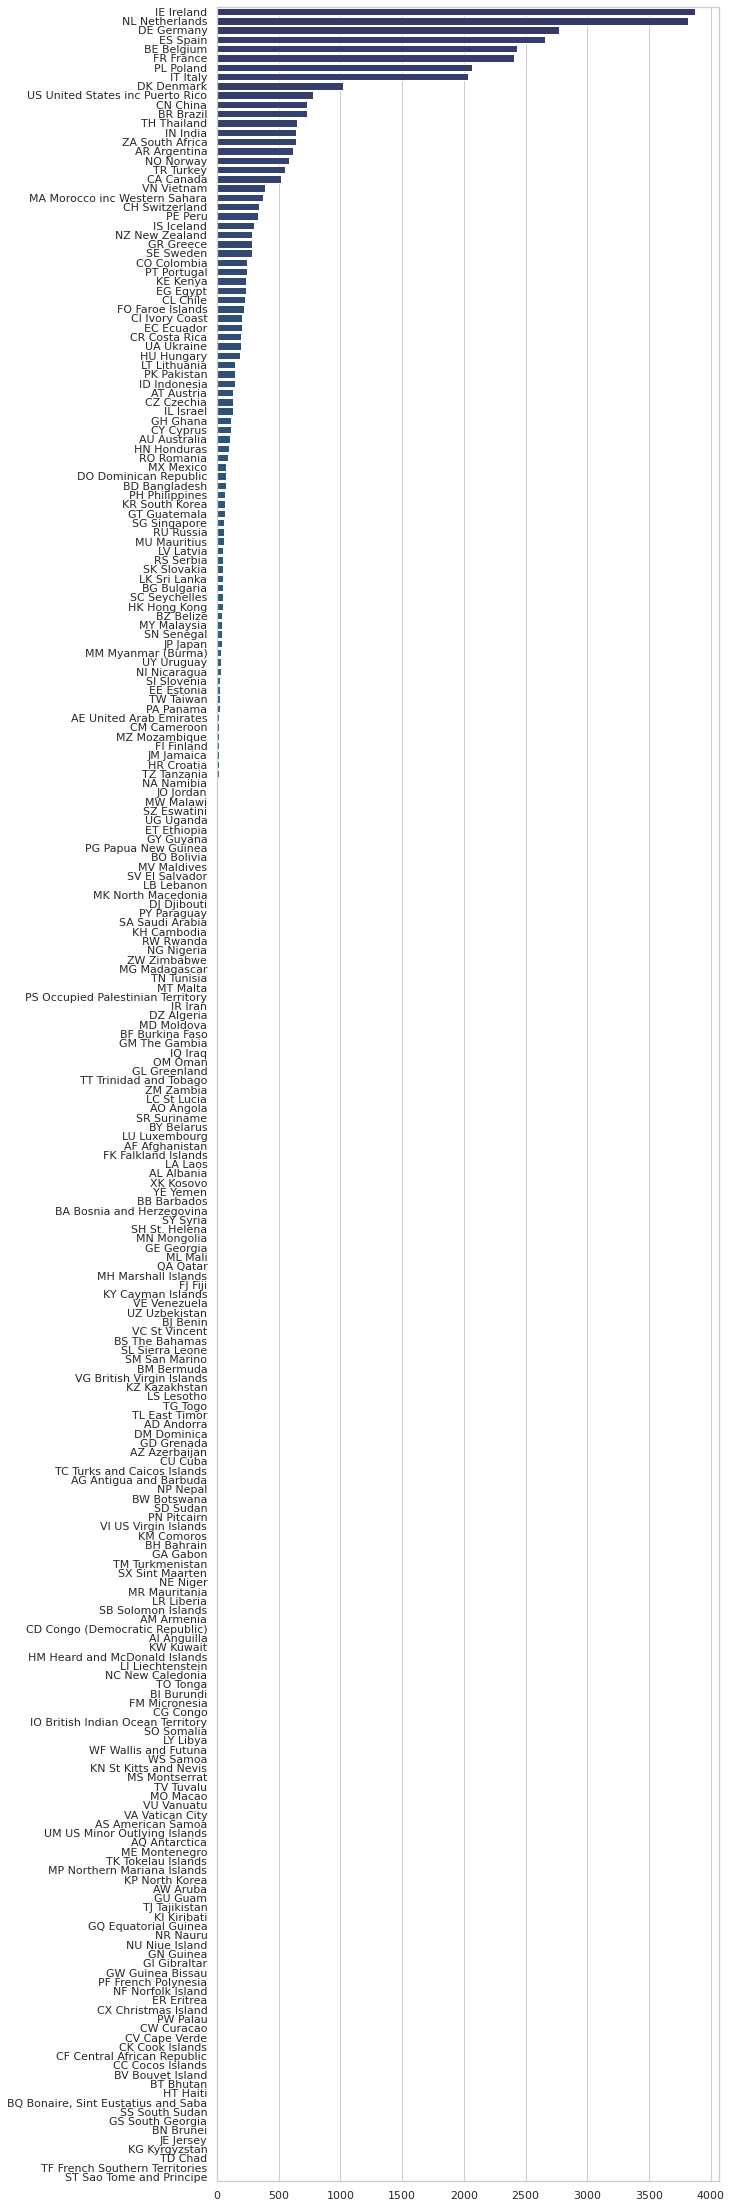

In [55]:
# create bar chart

sns.set(style="whitegrid")
#sns.set_theme(style='darkgrid')
plt.figure(figsize=(9, 40))

ax = sns.barplot( x="total2021",
                  y="COUNTRY", 
                 #hue="room_type",
                  data=countries1,
                  order = countries1["COUNTRY"],
                  palette="crest_r")

#plt.xlabel("Airbnb Listings Density per Borough (1/ha)", size=14)
plt.xlabel(None)
plt.ylabel(None)

#plt.savefig("Barplot_Listings_Density_per_Borough.png", bbox_inches = 'tight')



### load file with lang lot info

In [56]:
# https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-state

In [57]:
coords = pd.read_csv("Data/raw/world_country_and_usa_states_latitude_and_longitude_values.csv")
coords.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [58]:
coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         244 non-null    object 
 1   latitude             244 non-null    float64
 2   longitude            244 non-null    float64
 3   country              245 non-null    object 
 4   usa_state_code       52 non-null     object 
 5   usa_state_latitude   52 non-null     float64
 6   usa_state_longitude  52 non-null     float64
 7   usa_state            52 non-null     object 
dtypes: float64(4), object(4)
memory usage: 15.4+ KB


In [59]:
coords.columns

Index(['country_code', 'latitude', 'longitude', 'country', 'usa_state_code',
       'usa_state_latitude', 'usa_state_longitude', 'usa_state'],
      dtype='object')

In [60]:
keep = ['country_code', 'latitude', 'longitude', 'country']
coords = coords[keep]
coords.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [61]:
coords["code country"] = coords["country_code"] + " " + coords["country"]
coords.head()

,country_code,latitude,longitude,country,code country
0,AD,42.546245,1.601554,Andorra,AD Andorra
1,AE,23.424076,53.847818,United Arab Emirates,AE United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan,AF Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda,AG Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla,AI Anguilla


In [62]:
coords[coords.country == "Ireland"]

,country_code,latitude,longitude,country,code country
99,IE,53.41291,-8.24389,Ireland,IE Ireland


In [65]:
countries1 = pd.merge(countries1, coords, left_on = "COUNTRY", right_on="code country", how= "left")

In [66]:
countries1.head()

,COUNTRY,total2018,total2019,total2020,total2021,country_code,latitude,longitude,country,code country
0,IE Ireland,4526.46,4491.43,4493.01,3872.34,IE,53.412910,-8.243890,Ireland,IE Ireland
1,NL Netherlands,4777.85,4877.34,4551.89,3816.09,NL,52.132633,5.291266,Netherlands,NL Netherlands
2,DE Germany,3822.57,4153.08,4127.50,2772.28,DE,51.165691,10.451526,Germany,DE Germany
3,ES Spain,2761.35,2981.66,3074.73,2659.40,ES,40.463667,-3.749220,Spain,ES Spain
4,BE Belgium,2085.93,2221.84,2167.83,2430.49,BE,50.503887,4.469936,Belgium,BE Belgium


In [68]:
countries1 = countries1.drop(["COUNTRY"],axis=1)
countries1.head()

KeyError: "['COUNTRY'] not found in axis"

In [91]:
countriestotal= countries1.set_index("country")
countriestotal.head()

,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
country,,,,,,,,
Ireland,4526.46,4491.43,4493.01,3872.34,IE,53.412910,-8.243890,IE Ireland
Netherlands,4777.85,4877.34,4551.89,3816.09,NL,52.132633,5.291266,NL Netherlands
Germany,3822.57,4153.08,4127.50,2772.28,DE,51.165691,10.451526,DE Germany
Spain,2761.35,2981.66,3074.73,2659.40,ES,40.463667,-3.749220,ES Spain
Belgium,2085.93,2221.84,2167.83,2430.49,BE,50.503887,4.469936,BE Belgium


In [92]:
countriestotal[countriestotal["total2019"]==0]

,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
country,,,,,,,,
NaN,0.01,0.0,0.00,0.46,NaN,NaN,NaN,NaN
Cayman Islands,0.00,0.0,0.00,0.28,KY,19.513469,-80.566956,KY Cayman Islands
Bermuda,0.00,0.0,0.00,0.19,BM,32.321384,-64.757370,BM Bermuda
Andorra,0.00,0.0,0.00,0.14,AD,42.546245,1.601554,AD Andorra
Azerbaijan,0.00,0.0,0.00,0.12,AZ,40.143105,47.576927,AZ Azerbaijan
NaN,0.00,0.0,0.00,0.08,NaN,NaN,NaN,NaN
Niger,0.00,0.0,0.00,0.05,NE,17.607789,8.081666,NE Niger
Liberia,0.00,0.0,0.10,0.04,LR,6.428055,-9.429499,LR Liberia
Armenia,0.03,0.0,0.02,0.04,AM,40.069099,45.038189,AM Armenia


In [93]:
countriestotal = countriestotal.dropna()

In [94]:
countriestotal = countriestotal[(countriestotal["total2018"]>=50) & (countriestotal["total2019"]>=50) & (countriestotal["total2020"]>=50) & (countriestotal["total2021"]>=50)]


In [95]:
countriestotal.head()

,total2018,total2019,total2020,total2021,country_code,latitude,longitude,code country
country,,,,,,,,
Ireland,4526.46,4491.43,4493.01,3872.34,IE,53.412910,-8.243890,IE Ireland
Netherlands,4777.85,4877.34,4551.89,3816.09,NL,52.132633,5.291266,NL Netherlands
Germany,3822.57,4153.08,4127.50,2772.28,DE,51.165691,10.451526,DE Germany
Spain,2761.35,2981.66,3074.73,2659.40,ES,40.463667,-3.749220,ES Spain
Belgium,2085.93,2221.84,2167.83,2430.49,BE,50.503887,4.469936,BE Belgium


In [96]:
#export and save the results
countriestotal.to_csv("Data/countriestotal.csv")